<a href="https://colab.research.google.com/github/Henrique-Vicentini/wine-clusterization/blob/main/clusteriza%C3%A7%C3%A3o_vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
#importar bibliotecas
import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

In [ ]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
#observar dados
#observar valores faltantes
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
#ver se há valores duplicados
print(df_wines.duplicated().sum())
df_wines.duplicated().any()

0


False

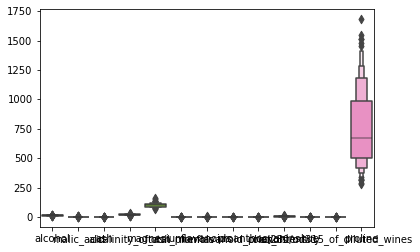

In [ ]:
sns.boxenplot(data = df_wines)

In [ ]:
#padronizar os dados 
sc = StandardScaler()
df_norm = pd.DataFrame(sc.fit_transform(df_wines), index = df_wines.index, columns = df_wines.columns)
df_norm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


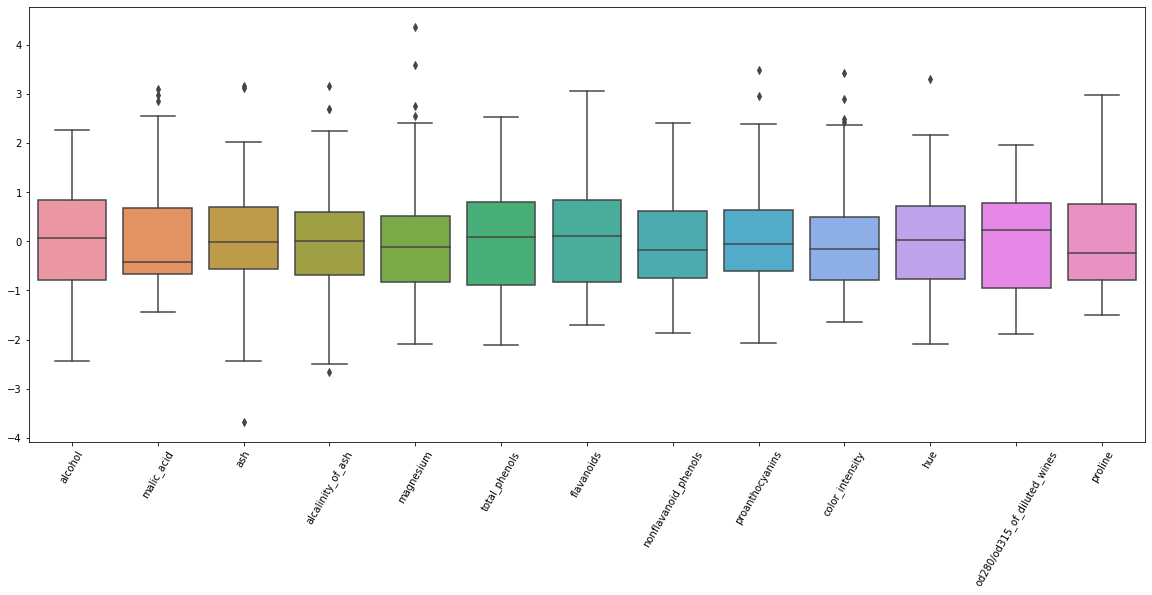

In [ ]:
#observar outliers depois da padronização
plt.figure(figsize= (20 , 8))
plt.xticks(rotation = 60)
sns.boxplot(data = df_norm)

In [ ]:
#ver se o valor absolut é maior que 3 para retirar os outliers
#df_norm.abs() > 3
df_norm.abs().gt(3).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               1
magnesium                       2
total_phenols                   0
flavanoids                      1
nonflavanoid_phenols            0
proanthocyanins                 1
color_intensity                 1
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
#retirar do dataframe
remover = df_norm.abs().gt(3).any(axis = 1)
df_norm = df_norm[~remover]
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       168 non-null    float64
 1   malic_acid                    168 non-null    float64
 2   ash                           168 non-null    float64
 3   alcalinity_of_ash             168 non-null    float64
 4   magnesium                     168 non-null    float64
 5   total_phenols                 168 non-null    float64
 6   flavanoids                    168 non-null    float64
 7   nonflavanoid_phenols          168 non-null    float64
 8   proanthocyanins               168 non-null    float64
 9   color_intensity               168 non-null    float64
 10  hue                           168 non-null    float64
 11  od280/od315_of_diluted_wines  168 non-null    float64
 12  proline                       168 non-null    float64
dtypes: fl

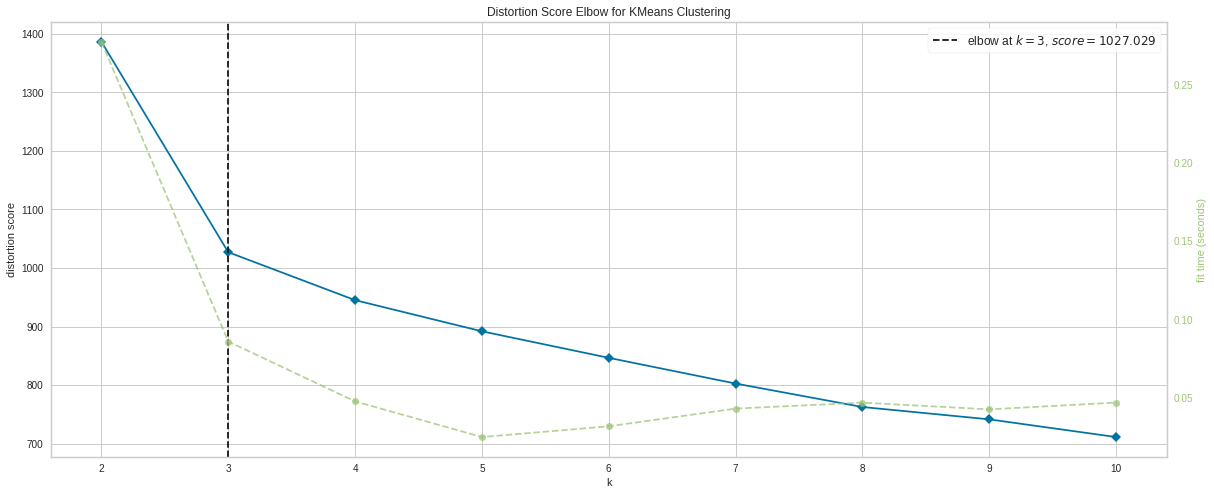

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0f0d8c520>,
                 estimator=KMeans(n_clusters=10))

In [ ]:
#ver o melhor K, utilizando o método do cutuvelo
plt.figure(figsize = (20 , 8))
kelbow_visualizer(KMeans(), df_norm, k = 10)

In [ ]:
#treinar o modelo
model = KMeans(4 , random_state = 0)
model.fit(df_norm)

KMeans(n_clusters=4, random_state=0)

In [ ]:
predição = model.predict(df_norm)
df_norm_cluster = df_norm
df_norm_cluster['cluster']= predição
df_norm_cluster

<ipython-input-74-237e881257bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_cluster['cluster']= predição


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


In [ ]:
#ver os centroides e os labels
centroids = model.cluster_centers_
labels = model.labels_

In [ ]:
#transformar em dataframe para colocar no DF 
pd.DataFrame(centroids, columns = df_norm.columns).T

,0,1,2,3
alcohol,0.146964,0.960537,-0.974152,-0.786132
malic_acid,0.937031,-0.316354,-0.395284,-0.453349
ash,0.195499,0.309729,0.191113,-0.790481
alcalinity_of_ash,0.528549,-0.774933,0.648933,-0.143883
magnesium,-0.076428,0.455725,-0.490200,-0.549105
total_phenols,-1.026817,0.897698,-0.628614,0.265048
flavanoids,-1.237424,0.974760,-0.367120,0.316454
nonflavanoid_phenols,0.700397,-0.607763,0.797288,-0.502648
proanthocyanins,-0.816473,0.563785,-0.495663,0.255705
color_intensity,0.903750,0.241598,-0.916222,-0.806486


In [ ]:
df_norm.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'cluster'],
      dtype='object')

In [ ]:
group_cluster = df_norm_cluster.groupby('cluster').agg({
                                                
    'alcohol':'mean',
     'malic_acid':'mean',
      'ash':'mean',
       'alcalinity_of_ash':'mean',
        'magnesium':'mean',
               'total_phenols':'mean',
                'flavanoids':'mean',
                 'nonflavanoid_phenols':'mean',
                        'proanthocyanins':'mean',
                         'color_intensity':'mean',
                          'hue':'mean',
                           'od280/od315_of_diluted_wines':'mean',
                            'proline':'mean'}
                            )
group_cluster

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,0.146964,0.937031,0.195499,0.528549,-0.076428,-1.026817,-1.237424,0.700397,-0.816473,0.903750,-1.179659,-1.296928,-0.398762
1,0.960537,-0.316354,0.309729,-0.774933,0.455725,0.897698,0.974760,-0.607763,0.563785,0.241598,0.463243,0.786065,1.220968
2,-0.974152,-0.395284,0.191113,0.648933,-0.490200,-0.628614,-0.367120,0.797288,-0.495663,-0.916222,0.401839,-0.154359,-0.709675
3,-0.786132,-0.453349,-0.790481,-0.143883,-0.549105,0.265048,0.316454,-0.502648,0.255705,-0.806486,0.453388,0.521338,-0.734021


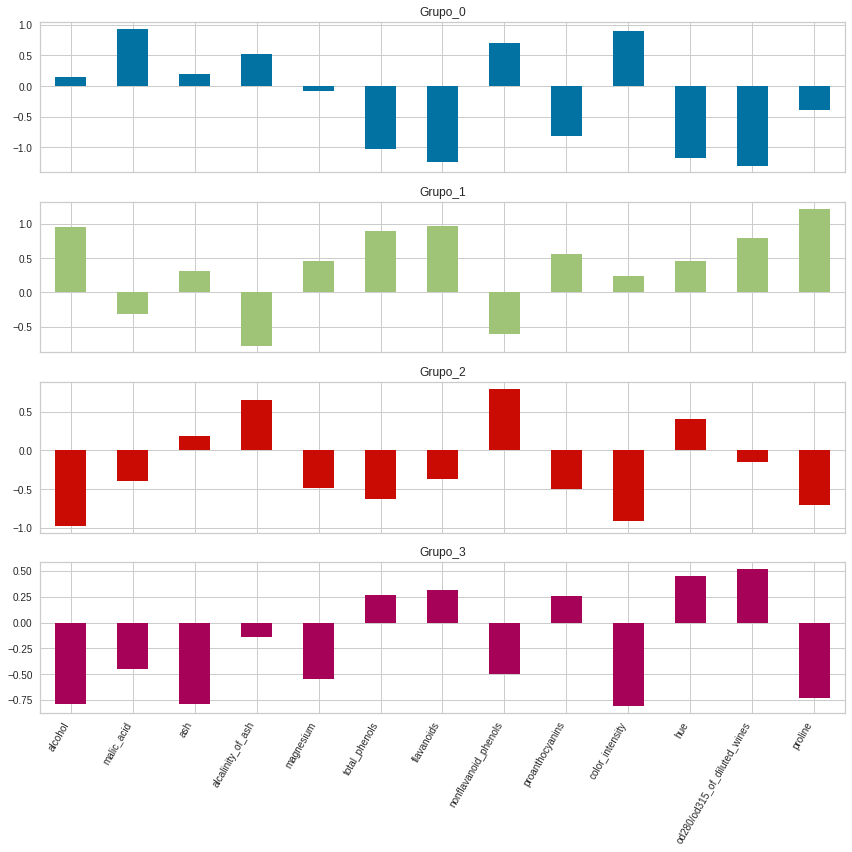

In [ ]:
(
  pd.DataFrame(centroids, columns=df_norm.columns)
  .T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()